# Data Preparation of Diabetes Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head(30)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Dropping identifying columns since it was not considered relevant to the outcome

In [6]:
#identifying_columns = ['encounter_id']
#df.drop(identifying_columns, axis=1, inplace=True)

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Dealing with Missing Values

Identify number of missing values which were coded as “?” for most variables in the data and replace with NaN

In [8]:
df.replace("?", np.nan, inplace = True)

In [9]:
# For Gender it was labelled as Unknown
print('Number of missing values for gender = ', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

Number of missing values for gender =  3


In [10]:
# Gender has only 3 invalid values so we decided to drop these records
df.drop(df[df.gender == "Unknown/Invalid"].index, inplace=True)

# Percentage of Values Missing

In [11]:
df.isna().mean().round(4) * 100

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

# Visualization of missing observations using missingno library

The bars are proportional to the number of non-missing values and it provides the actual number of non-missing values. We get an idea of how much of each column is missing.

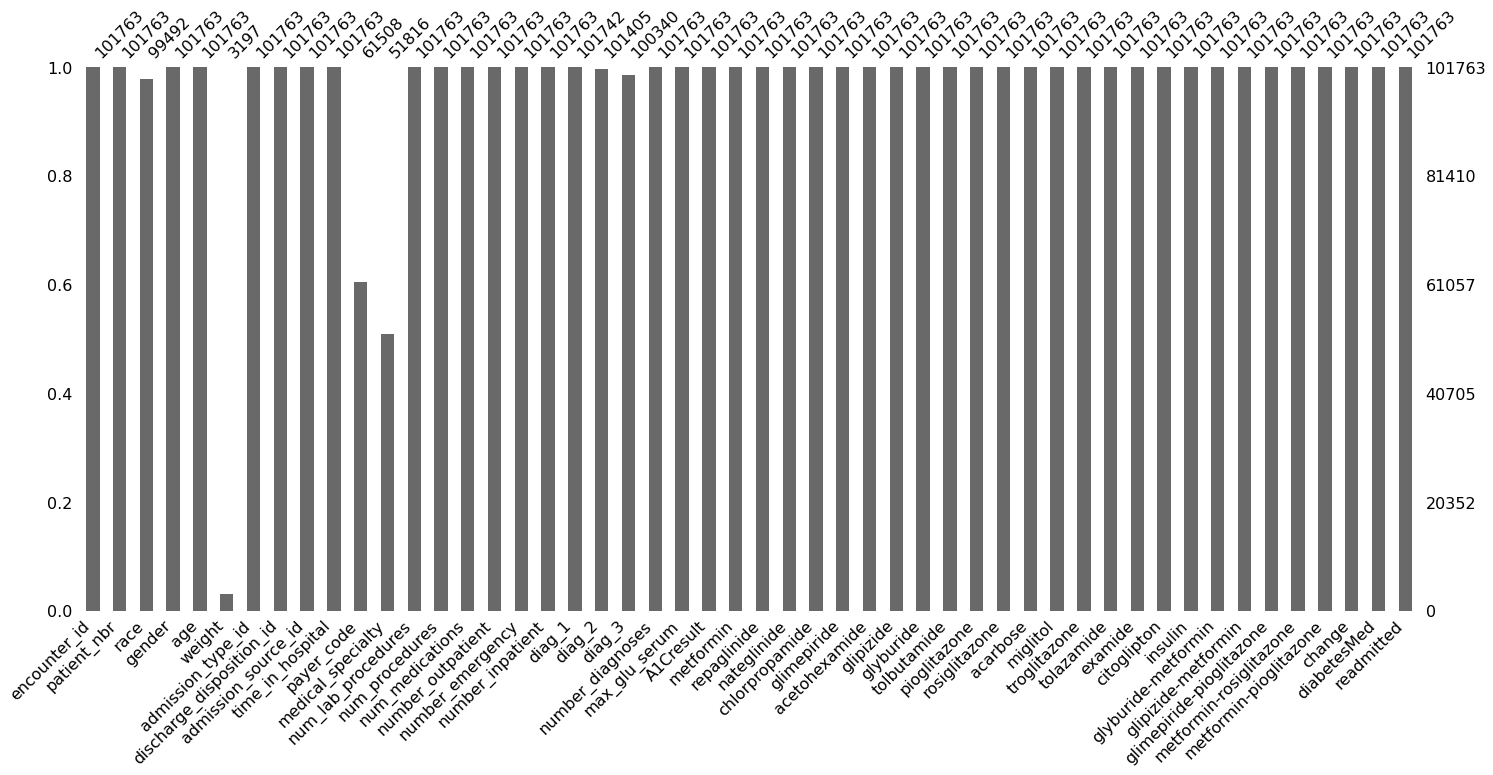

In [12]:
msno.bar(df)

The variables 'weight', 'payer_code', and 'medical_specialty' had a high percentage of missing values, which made them unusable. Therefore, we chose to remove them but acknowledge there are other ways too to deal with such missing values.

In [13]:
incomplete_columns = ['weight', 'payer_code', 'medical_specialty']
df.drop(incomplete_columns, axis=1, inplace=True)

Race has 2.23% of missing values so we chose to replace "?" with "Other" as it could be the case that this was just a data entry error.

In [14]:
df['race'] = df['race'].replace(['?'],'Other')

# Multiple Encounters of a Patient

The dataset contained multiple impatient visits for some patients and was unclear if the visits were statistically independent. We thus decided to use only the first encounter for each patient visit.

In [15]:
# unique patients in the dataset
n_admissions = df['patient_nbr'].nunique()
print("Number of unique patients:{}".format(n_admissions))

# unique encounters in the dataset
n_patients = df['encounter_id'].nunique()
print("Total number of hospital admissions:{}".format(n_patients))

admissions_per_patient = df['patient_nbr'].value_counts().reset_index()
admissions_per_patient.columns = ['patient_nbr', 'count']
multiple_admissions = admissions_per_patient[admissions_per_patient['count'] > 1]

print(f"Proportion of patients that have multiple admissions: {multiple_admissions['patient_nbr'].nunique()/n_patients:.2%}")
print(f"Maximum number of admissions for a given patient: {multiple_admissions['count'].max()}")

Number of unique patients:71515
Total number of hospital admissions:101763
Proportion of patients that have multiple admissions: 16.48%
Maximum number of admissions for a given patient: 40


In [16]:
df.drop_duplicates(subset=['patient_nbr'], keep ='first', inplace=True)

We then decided to drop identifying columns as they are arbitrary and do not provide much significance to the readmission of patients and hence can be removed

In [17]:
# Drop identifying columns
identifying_columns = ['encounter_id', 'patient_nbr']
df.drop(identifying_columns, axis=1, inplace=True)

# Creating a Target Variable

Text(0, 0.5, '% of People')

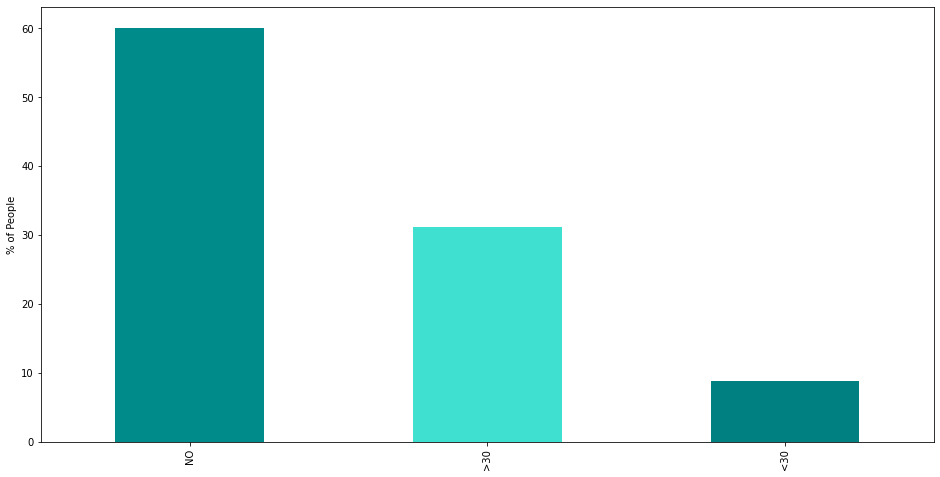

In [18]:
# The distribution of the Outcome variable was examined.
df_outcome = df["readmitted"].value_counts()*100/len(df)
df_outcome.plot(kind='bar',stacked=True, color=['darkcyan', 'turquoise', 'teal'], figsize=(16,8))
plt.ylabel('% of People')

We can see there are three types of values:- 'NO','<30','>30'. So, to keep things simple, we’ll view this as a binary classification problem: did the patient get readmitted? 

In [19]:
readmitted = {
    "NO": 0,
    "<30": 1,
    ">30": 1
}

df['readmitted'] = df['readmitted'].apply(lambda x: readmitted[x])

Lets once again plot 'readmitted' to view the changes

Text(0, 0.5, '% of Patients')

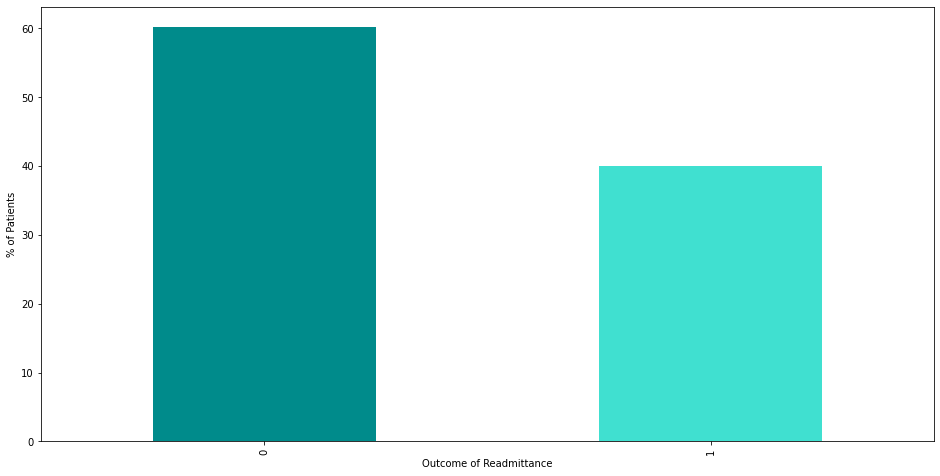

In [20]:
df_outcome = df["readmitted"].value_counts()*100/len(df)
df_outcome.plot(kind='bar', color=['darkcyan', 'turquoise'], stacked=True, figsize=(16,8))
plt.xlabel('Outcome of Readmittance')
plt.ylabel('% of Patients')

# Patient Demographics: Age, Gender and Race

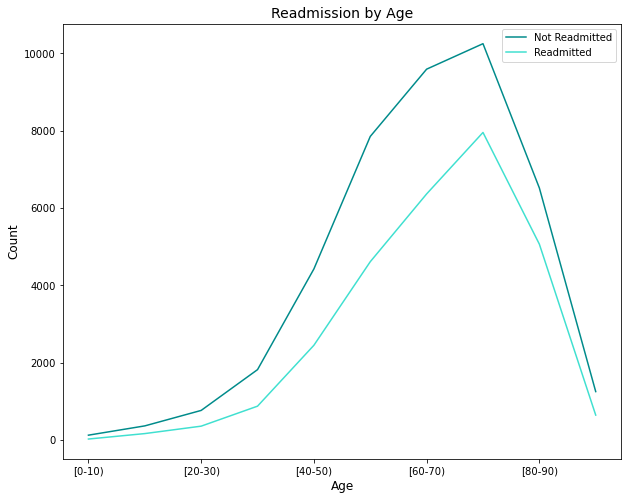

In [21]:
# Readmission by Age

age_plot = pd.DataFrame(df.groupby(by = 'age')['readmitted'].value_counts())
age_plot.unstack().plot(kind='line', color=['darkcyan', 'turquoise'], figsize=(10,8))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Age', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

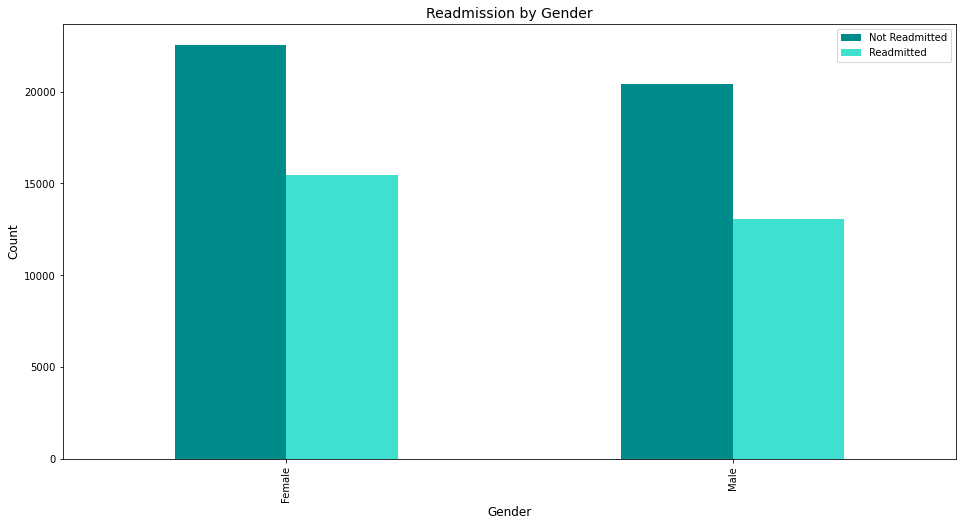

In [22]:
# Readmission by Gender

age_plot = pd.DataFrame(df.groupby(by = 'gender')['readmitted'].value_counts())
age_plot.unstack().plot(kind='bar', color=['darkcyan', 'turquoise'], figsize=(16,8))
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Gender', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

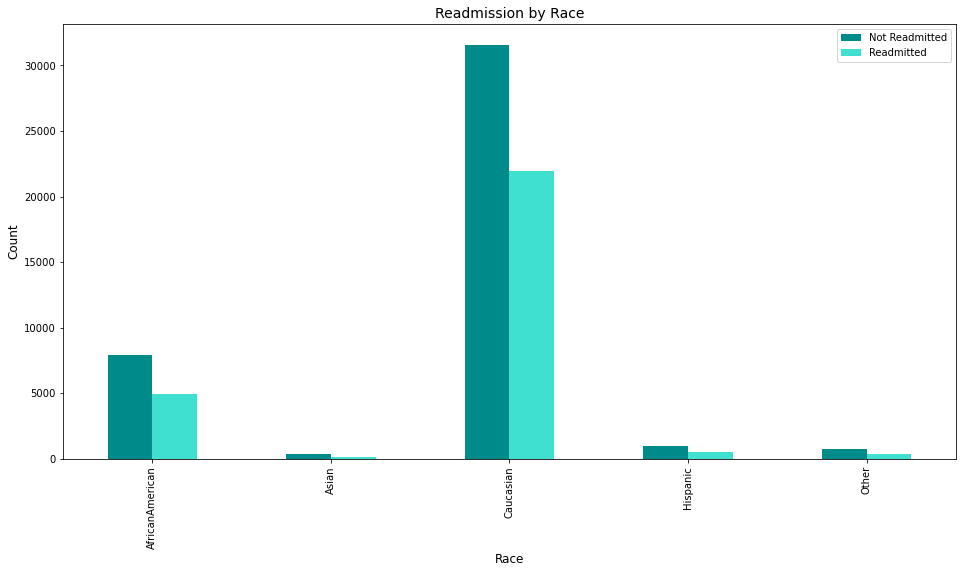

In [23]:
# Readmission by Race

race_plot = pd.DataFrame(df.groupby(by = 'race')['readmitted'].value_counts())
race_plot.unstack().plot(kind='bar', color=['darkcyan', 'turquoise'], figsize=(16,8))
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Race', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

# How long were hospital stays for a given admission?

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


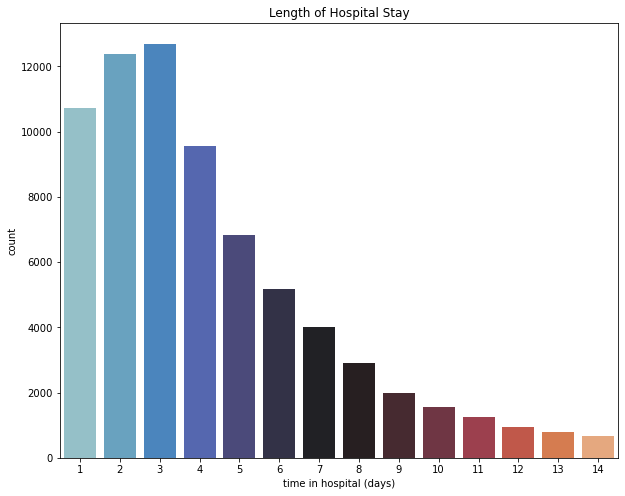

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df['time_in_hospital'], palette='icefire')
plt.xlabel("time in hospital (days)")
plt.title("Length of Hospital Stay")
plt.show()

<Figure size 1440x1080 with 0 Axes>

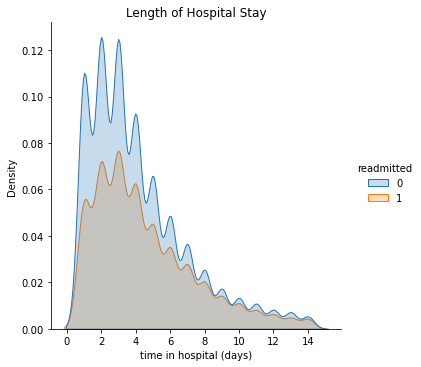

In [67]:
plt.figure(figsize=(20,15))
sns.displot(df, x="time_in_hospital", hue="readmitted", kind="kde", fill=True)
plt.xlabel("time in hospital (days)")
plt.title("Length of Hospital Stay")
plt.show()

# What proportion of patients were on diabetes medication during their hospital stay?

In [26]:
df['diabetesMed'].value_counts(normalize=True)

Yes    0.759519
No     0.240481
Name: diabetesMed, dtype: float64

77% of patients were on diabetes medication during their stay.

# Distribution of patients based on Presence of Diabetes Medication

Text(0.5, 1.0, 'Not Readmitted Patient')

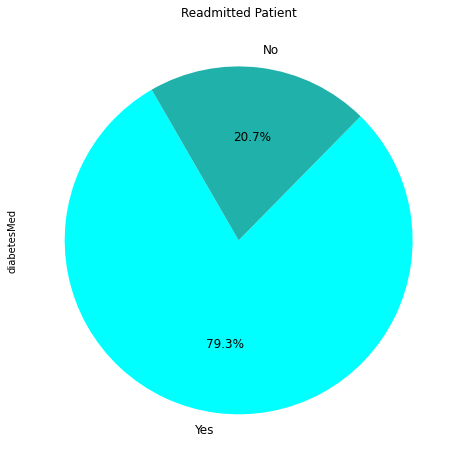

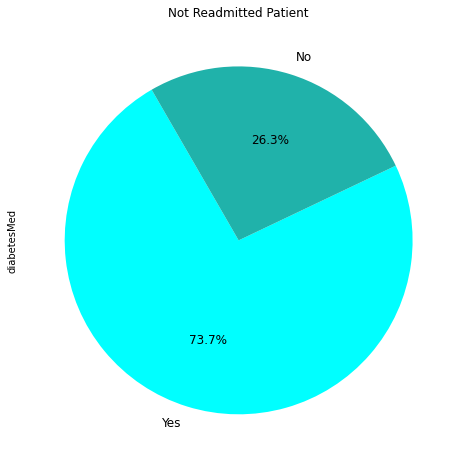

In [27]:
colors = ['aqua','lightseagreen']

fig = plt.figure(figsize = (10, 8)) 
ax = df[df.readmitted == 1].diabetesMed.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Readmitted Patient')

fig = plt.figure(figsize = (10, 8)) 
ax = df[df.readmitted == 0].diabetesMed.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Not Readmitted Patient')

# Decoding Discharge Location

In [28]:
discharge_disposition = pd.read_csv("https://s3.us-east-2.amazonaws.com/explore.datasets/diabetes/id_mappers/discharge_disposition_id.csv")
discharge_disposition.sample(n=5, random_state=416)

,discharge_disposition_id,description
13,14,Hospice / medical facility
8,9,Admitted as an inpatient to this hospital
14,15,Discharged/transferred within this institution...
20,21,"Expired, place unknown. Medicaid only, hospice."
29,29,Discharged/transferred to a Critical Access Ho...


Given the table above, “expired” is defined as a patient who has died. We only want to predict hospital readmission for living patients so we removed hospital admissions for records as “expired”. We also removed patients who are still in the hospital.

In [29]:
dispos_to_drop = [20, 21, 22, 23, 24, 25, 26 , 27, 28, 29, 40, 41, 49, 11, 13, 14, 19]
for i in dispos_to_drop:
    df.drop(df[df.discharge_disposition_id == i].index, inplace=True)

# Number of Medications and Lab Procedures

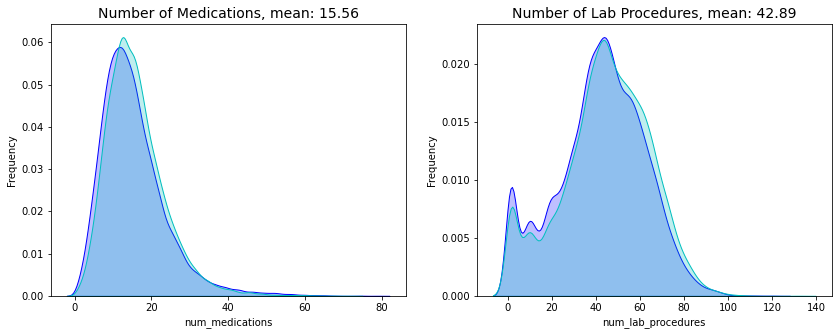

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(df.loc[(df['readmitted'] == 0), 'num_medications'], shade=True, label = 'Not Readmitted', color = "b")
sns.kdeplot(df.loc[(df['readmitted'] == 1), 'num_medications'], shade=True, label = 'Readmitted', color = "c")
plt.ylabel("Frequency")
plt.title(f"Number of Medications, mean: {df['num_medications'].mean():.2f}", size=14)

plt.subplot(1,2,2)
sns.kdeplot(df.loc[(df['readmitted'] == 0), 'num_lab_procedures'], shade=True, label = 'Not Readmitted', color = "b")
sns.kdeplot(df.loc[(df['readmitted'] == 1), 'num_lab_procedures'], shade=True, label = 'Readmitted', color = "c")
plt.title(f"Number of Lab Procedures, mean: {df['num_lab_procedures'].mean():.2f}", size=14)
plt.ylabel("Frequency")
plt.show()

Patients on average were administered 15 distinct generic medications and 42 different lab procedures during the encounter. However, the distributions between readmitted and not readmitted patients follows the same pattern. 

In [31]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

print(f"There are {len(medicine_columns)} medications as columns in the dataset.")

There are 23 medications as columns in the dataset.


Values for each medication: 

- “No” : the drug was not prescribed during the encounter
- “Up” : the dosage was increased during the encounter
- “Down” : the dosage was decreased during the encounter
- “Steady” : the dosage did not change during the encounter

In [32]:
# Create a dataframe from the medication columns
medicine_df = df[medicine_columns]

In [72]:
# Define a function that returns 0 if they are not on a medication and 1 if they are on a medication
def is_changed(x):
    same = ['No']
    return 0 if x in same else 1

In [34]:
medicine_df_temp = medicine_df.apply(lambda x: [is_changed(i) for i in x])

Text(0.5, 1.0, 'Number of Patients on a Given Medication')

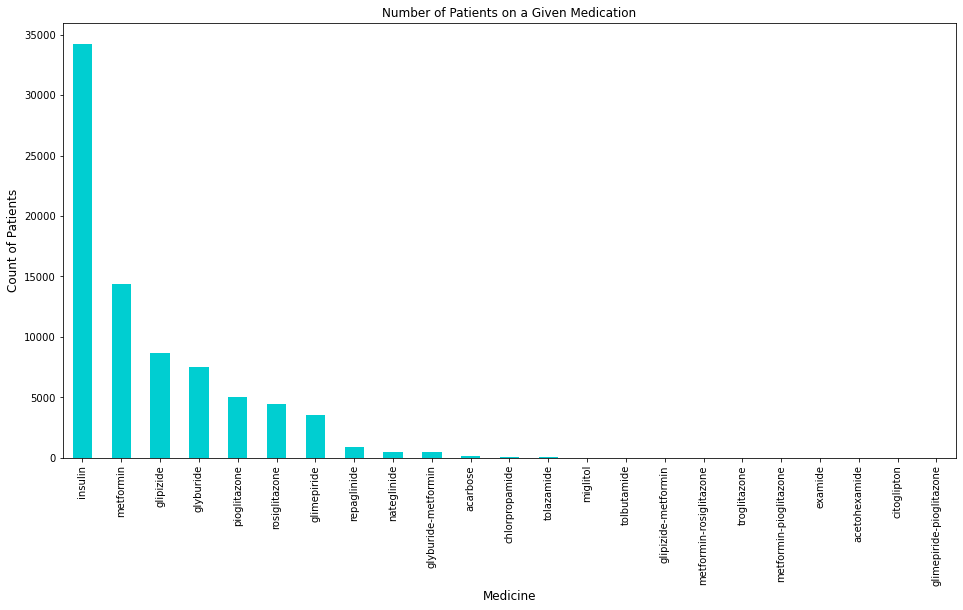

In [35]:
medicine_df_temp.sum(axis=0).sort_values(ascending=False).plot(kind='bar', color=['darkturquoise'], figsize=(16,8))
plt.xlabel('Medicine', fontsize=12)
plt.ylabel('Count of Patients',fontsize=12)
plt.title('Number of Patients on a Given Medication')

Text(0.5, 1.0, 'Top Ten Medications')

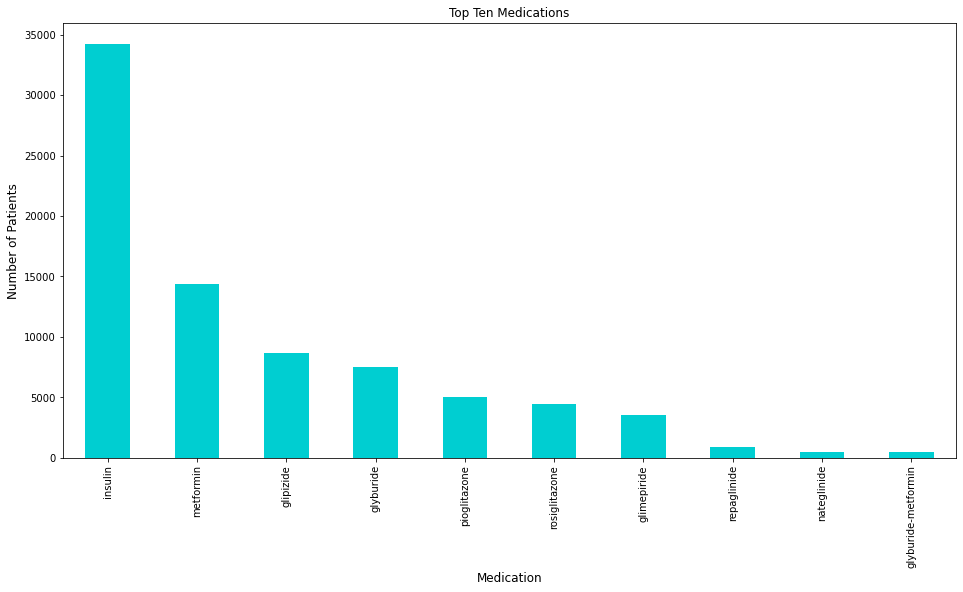

In [36]:
medicine_df_temp.sum(axis=0).sort_values(ascending=False).nlargest(10).plot(kind='bar', color='darkturquoise', figsize=(16,8))
plt.xlabel('Medication', fontsize=12)
plt.ylabel('Number of Patients',fontsize=12)
plt.title('Top Ten Medications')

In [37]:
readmitted_column = df['readmitted']
medicine_df_temp = pd.concat([medicine_df_temp, readmitted_column], axis =1)
medicine_df_temp['readmitted'].value_counts(normalize=True) *100

0    59.473333
1    40.526667
Name: readmitted, dtype: float64

Text(0.5, 1.0, '% of Patients that are on a Medication')

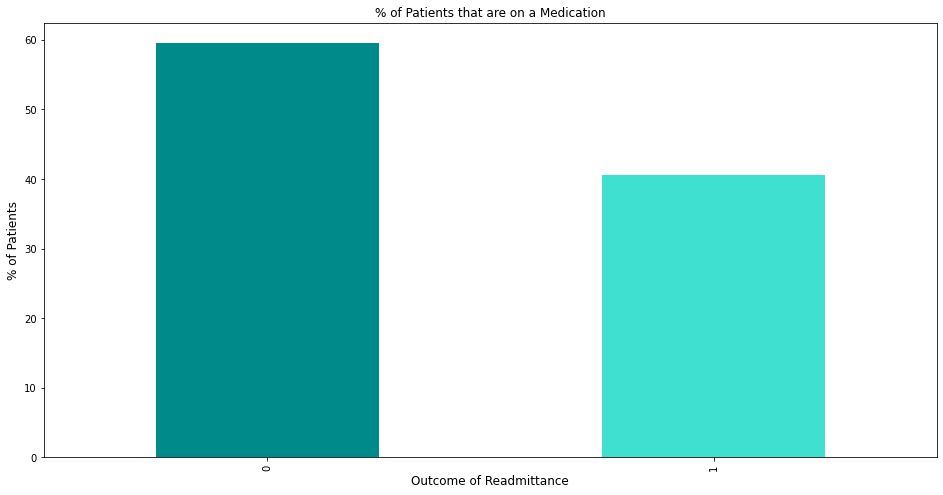

In [38]:
med_plot = medicine_df_temp['readmitted'].value_counts(normalize=True)*100
med_plot.plot(kind='bar', color=['darkcyan', 'turquoise'], figsize=(16,8))
plt.xlabel('Outcome of Readmittance', fontsize=12)
plt.ylabel('% of Patients', fontsize=12)
plt.title('% of Patients that are on a Medication',fontsize=12)

Since Insulin was the most prevalent medication, we wanted to determine if there was a difference between the number of patients taking the medication in each cohort of patient readmittance

In [71]:
medicine_df_temp[medicine_df_temp.readmitted == 1].insulin.value_counts()

1    14455
0    12862
Name: insulin, dtype: int64

Text(0.5, 1.0, 'Not Readmitted Patient')

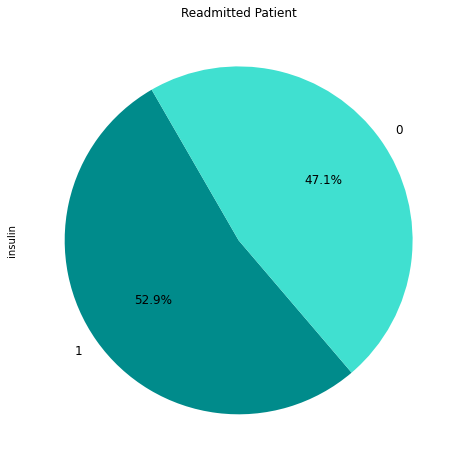

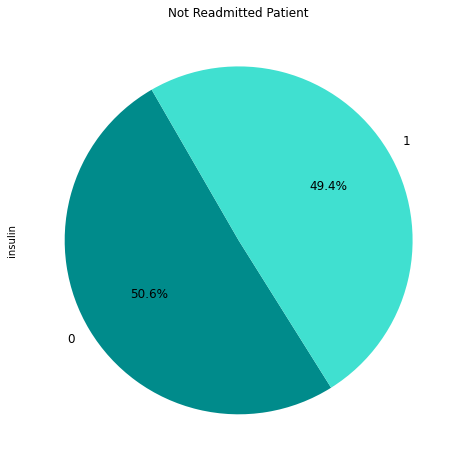

In [69]:
colors = ['darkcyan', 'turquoise']

fig = plt.figure(figsize = (10, 8)) 
ax = medicine_df_temp[medicine_df_temp.readmitted == 1].insulin.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Readmitted Patient')

fig = plt.figure(figsize = (10, 8)) 
ax = medicine_df_temp[medicine_df_temp.readmitted == 0].insulin.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Not Readmitted Patient')

Text(0.5, 1.0, 'Not Readmitted Patient')

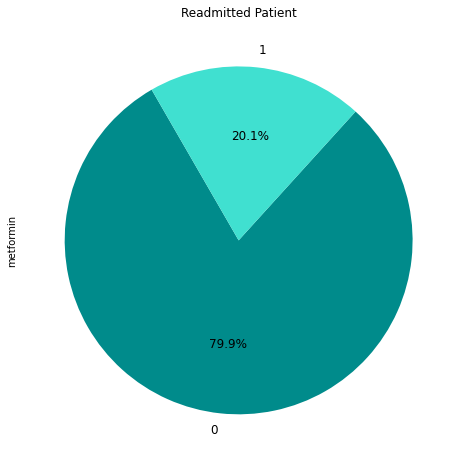

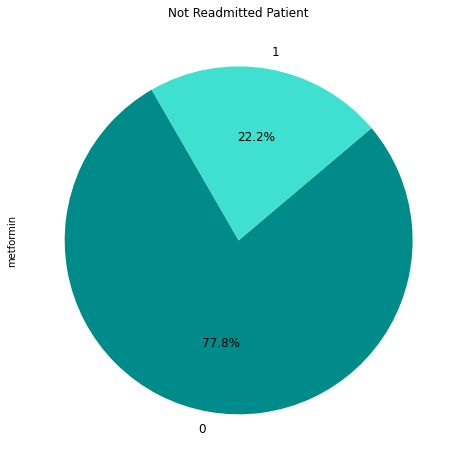

In [70]:
colors = ['darkcyan', 'turquoise']

fig = plt.figure(figsize = (10, 8)) 
ax = medicine_df_temp[medicine_df_temp.readmitted == 1].metformin.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Readmitted Patient')

fig = plt.figure(figsize = (10, 8)) 
ax = medicine_df_temp[medicine_df_temp.readmitted == 0].metformin.value_counts().plot.pie(autopct="%1.1f%%", startangle=120, colors=colors,
                                        textprops={'fontsize': 12},)
ax.set_title('Not Readmitted Patient')

In [73]:
# Create a new column that sums each row
medicine_df_temp['num_meds_changed'] = medicine_df_temp.apply(np.sum, axis=1)

In [ ]:
Is there a difference between the number of patients that 

Text(0, 0.5, 'Proportion of Patients')

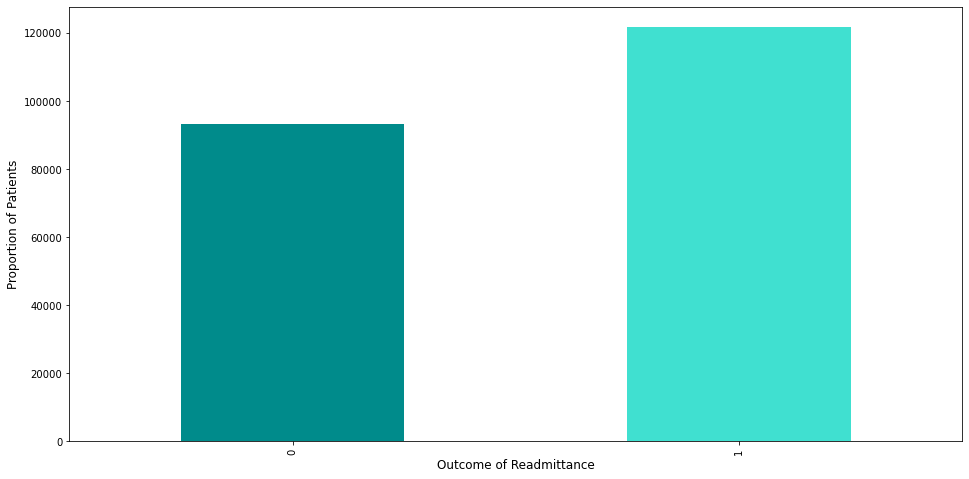

In [92]:
medicine_df_temp.groupby('readmitted')['num_meds_changed'].sum().plot(kind='bar', color=['darkcyan', 'turquoise'], figsize=(16,8))
plt.xlabel('Outcome of Readmittance', fontsize=12)
plt.ylabel('Proportion of Patients',fontsize=12)

In [41]:
# Add num_meds_changed to original df
df['num_meds_changed'] = medicine_df_temp['num_meds_changed']

# Dropping the medicine columns and the change column as num_meds_changed is now measuring the same thing
df.drop(medicine_columns, axis=1, inplace=True)
df.drop('change', axis=1, inplace=True)

Text(0, 0.5, 'Proportion of Patients')

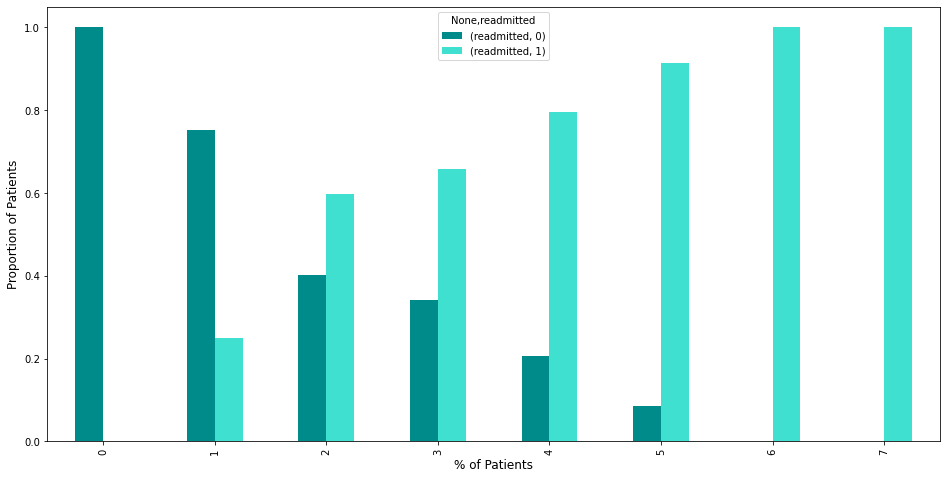

In [43]:
# Validate values 
med_change_plot = pd.DataFrame(medicine_df_temp.groupby('num_meds_changed')['readmitted'].value_counts(normalize=True))
med_change_plot.unstack().plot(kind='bar', color=['darkcyan', 'turquoise'], figsize=(16,8))
plt.xlabel('% of Patients', fontsize=12)
plt.ylabel('Proportion of Patients',fontsize=12)

Admission source is an identifier corresponding to 21 distinct values such as physician referral,
emergency room, and transfer from another hospital

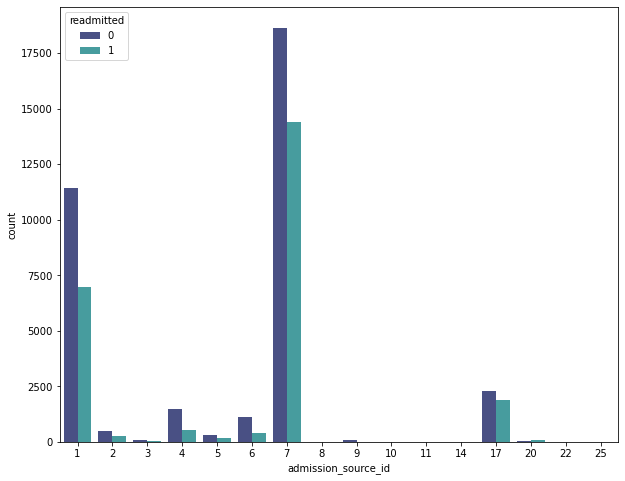

In [89]:
fig = plt.figure(figsize = (10, 8)) 
a = sns.countplot(x = 'admission_source_id', hue = 'readmitted', data = df, palette="mako")

We can see most patients fall into types 1, 7 and 17 which correspond to Emergency and Trauma respectively, and unknown for 17

# Classify Diagnoses by ICD-9

The dataset contained up to three diagnoses for a patient (primary, secondary and additional). Each diagnosis was coded as the first three digits of ICD9. Therefore, we collapsed these diagnosis codes into 17 disease categories corresponding to the classification table below. 

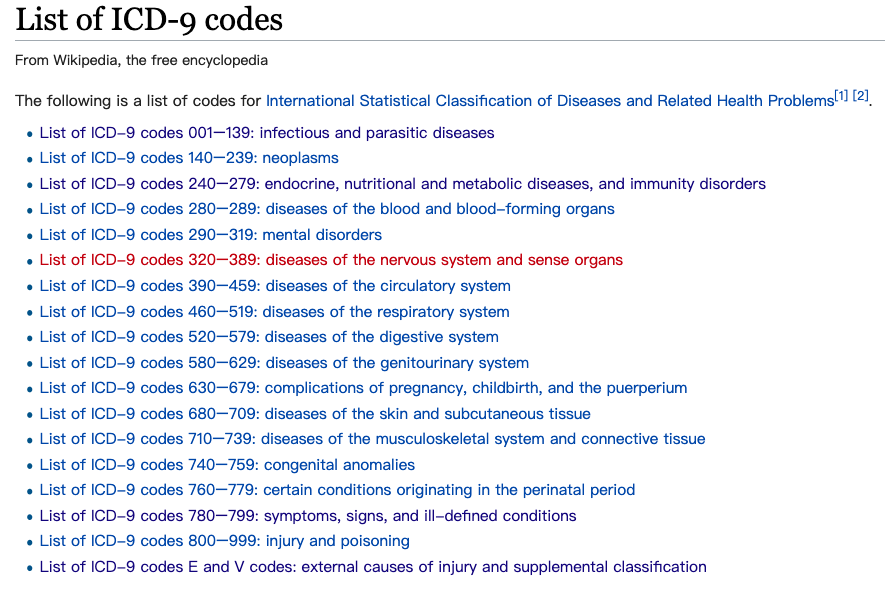

In [45]:
# The diagnoses columns contain over 848, 923, and 954 distinct values respectively. Here we are binning those
# into ranges of 17 different disease types defined by ICD9 codes
df = df[pd.to_numeric(df['diag_1'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['diag_2'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['diag_3'], errors='coerce').notnull()]

# Convert to Float64 dtypes because we want the decimals
df.diag_1 = df.diag_1.astype('float64')
df.diag_2 = df.diag_2.astype('float64')
df.diag_3 = df.diag_3.astype('float64')

In [46]:
# Converting the first diagnosis

for i, row in df.iterrows():
    if (row['diag_1'] >= 1 and row['diag_1'] <= 139): # infectious and parasitic diseases
        df.loc[i, 'diag_1'] = 1
    elif (row['diag_1'] >= 140 and row['diag_1'] <= 239): # neoplasms
        df.loc[i, 'diag_1'] = 2
    elif (row['diag_1'] >= 240 and row['diag_1'] <= 279): # endocrine, nutritional, metabolic & immunity disorders
        df.loc[i, 'diag_1'] = 3
    elif (row['diag_1'] >= 280 and row['diag_1'] <= 289): # diseases of the blood and blood-forming organis
        df.loc[i, 'diag_1'] = 4
    elif (row['diag_1'] >= 290 and row['diag_1'] <= 319): # mental disorders
        df.loc[i, 'diag_1'] = 5
    elif (row['diag_1'] >= 320 and row['diag_1'] <= 389): # diseases of the nervous system and sense organs
        df.loc[i, 'diag_1'] = 6
    elif (row['diag_1'] >= 390 and row['diag_1'] <= 459): # diseases of the circulatory system
        df.loc[i, 'diag_1'] = 7
    elif (row['diag_1'] >= 460 and row['diag_1'] <= 519): # diseases of the respiratory system
        df.loc[i, 'diag_1'] = 8
    elif (row['diag_1'] >= 520 and row['diag_1'] <= 579): # diseases of the digestive system
        df.loc[i, 'diag_1'] = 9
    elif (row['diag_1'] >= 580 and row['diag_1'] <= 629): # diseases of the genitourinary system
        df.loc[i, 'diag_1'] = 10
    elif (row['diag_1'] >= 630 and row['diag_1'] <= 679): # complications of pregnancy, childbirth and the puerperium
        df.loc[i, 'diag_1'] = 11
    elif (row['diag_1'] >= 680 and row['diag_1'] <= 709): # diseases of the skin and subcutaneuous tissue
        df.loc[i, 'diag_1'] = 12
    elif (row['diag_1'] >= 710 and row['diag_1'] <= 739): # diseases of the muscuskeletal system and connective tissue
        df.loc[i, 'diag_1'] = 13
    elif (row['diag_1'] >= 740 and row['diag_1'] <= 759): # congenital anomalies
        df.loc[i, 'diag_1'] = 14
    elif (row['diag_1'] >= 760 and row['diag_1'] <= 779): # certain condtions originating in the perinatal period
        df.loc[i, 'diag_1'] = 15
    elif (row['diag_1'] >= 780 and row['diag_1'] <= 799): # symptoms, signs and ill-defined conditions
        df.loc[i, 'diag_1'] = 16
    elif (row['diag_1'] >= 800 and row['diag_1'] <= 999): # injury and poisoning
        df.loc[i, 'diag_1'] = 17

In [47]:
# Converting the second diagnosis

for i, row in df.iterrows():
    if (row['diag_2'] >= 1 and row['diag_2'] <= 139): # infectious and parasitic diseases
        df.loc[i, 'diag_2'] = 1
    elif (row['diag_2'] >= 140 and row['diag_2'] <= 239): # neoplasms
        df.loc[i, 'diag_2'] = 2
    elif (row['diag_2'] >= 240 and row['diag_2'] <= 279): # endocrine, nutritional, metabolic & immunity disorders
        df.loc[i, 'diag_2'] = 3
    elif (row['diag_2'] >= 280 and row['diag_2'] <= 289): # diseases of the blood and blood-forming organis
        df.loc[i, 'diag_2'] = 4
    elif (row['diag_2'] >= 290 and row['diag_2'] <= 319): # mental disorders
        df.loc[i, 'diag_2'] = 5
    elif (row['diag_2'] >= 320 and row['diag_2'] <= 389): # diseases of the nervous system and sense organs
        df.loc[i, 'diag_2'] = 6
    elif (row['diag_2'] >= 390 and row['diag_2'] <= 459): # diseases of the circulatory system
        df.loc[i, 'diag_2'] = 7
    elif (row['diag_2'] >= 460 and row['diag_2'] <= 519): # diseases of the respiratory system
        df.loc[i, 'diag_2'] = 8
    elif (row['diag_2'] >= 520 and row['diag_2'] <= 579): # diseases of the digestive system
        df.loc[i, 'diag_2'] = 9
    elif (row['diag_2'] >= 580 and row['diag_2'] <= 629): # diseases of the genitourinary system
        df.loc[i, 'diag_2'] = 10
    elif (row['diag_2'] >= 630 and row['diag_2'] <= 679): # complications of pregnancy, childbirth and the puerperium
        df.loc[i, 'diag_2'] = 11
    elif (row['diag_2'] >= 680 and row['diag_2'] <= 709): # diseases of the skin and subcutaneuous tissue
        df.loc[i, 'diag_2'] = 12
    elif (row['diag_2'] >= 710 and row['diag_2'] <= 739): # diseases of the muscuskeletal system and connective tissue
        df.loc[i, 'diag_2'] = 13
    elif (row['diag_2'] >= 740 and row['diag_2'] <= 759): # congenital anomalies
        df.loc[i, 'diag_2'] = 14
    elif (row['diag_2'] >= 760 and row['diag_2'] <= 779): # certain condtions originating in the perinatal period
        df.loc[i, 'diag_2'] = 15
    elif (row['diag_2'] >= 780 and row['diag_2'] <= 799): # symptoms, signs and ill-defined conditions
        df.loc[i, 'diag_2'] = 16
    elif (row['diag_2'] >= 800 and row['diag_2'] <= 999): # injury and poisoning
        df.loc[i, 'diag_2'] = 17

In [48]:
# Converting the third diagnosis

for i, row in df.iterrows():
    if (row['diag_3'] >= 1 and row['diag_3'] <= 139): # infectious and parasitic diseases
        df.loc[i, 'diag_3'] = 1
    elif (row['diag_3'] >= 140 and row['diag_3'] <= 239): # neoplasms
        df.loc[i, 'diag_3'] = 2
    elif (row['diag_3'] >= 240 and row['diag_3'] <= 279): # endocrine, nutritional, metabolic & immunity disorders
        df.loc[i, 'diag_3'] = 3
    elif (row['diag_3'] >= 280 and row['diag_3'] <= 289): # diseases of the blood and blood-forming organis
        df.loc[i, 'diag_3'] = 4
    elif (row['diag_3'] >= 290 and row['diag_3'] <= 319): # mental disorders
        df.loc[i, 'diag_3'] = 5
    elif (row['diag_3'] >= 320 and row['diag_3'] <= 389): # diseases of the nervous system and sense organs
        df.loc[i, 'diag_3'] = 6
    elif (row['diag_3'] >= 390 and row['diag_3'] <= 459): # diseases of the circulatory system
        df.loc[i, 'diag_3'] = 7
    elif (row['diag_3'] >= 460 and row['diag_3'] <= 519): # diseases of the respiratory system
        df.loc[i, 'diag_3'] = 8
    elif (row['diag_3'] >= 520 and row['diag_3'] <= 579): # diseases of the digestive system
        df.loc[i, 'diag_3'] = 9
    elif (row['diag_3'] >= 580 and row['diag_3'] <= 629): # diseases of the genitourinary system
        df.loc[i, 'diag_3'] = 10
    elif (row['diag_3'] >= 630 and row['diag_3'] <= 679): # complications of pregnancy, childbirth and the puerperium
        df.loc[i, 'diag_3'] = 11
    elif (row['diag_3'] >= 680 and row['diag_3'] <= 709): # diseases of the skin and subcutaneuous tissue
        df.loc[i, 'diag_3'] = 12
    elif (row['diag_3'] >= 710 and row['diag_3'] <= 739): # diseases of the muscuskeletal system and connective tissue
        df.loc[i, 'diag_3'] = 13
    elif (row['diag_3'] >= 740 and row['diag_3'] <= 759): # congenital anomalies
        df.loc[i, 'diag_3'] = 14
    elif (row['diag_3'] >= 760 and row['diag_3'] <= 779): # certain condtions originating in the perinatal period
        df.loc[i, 'diag_3'] = 15
    elif (row['diag_3'] >= 780 and row['diag_3'] <= 799): # symptoms, signs and ill-defined conditions
        df.loc[i, 'diag_3'] = 16
    elif (row['diag_3'] >= 800 and row['diag_3'] <= 999): # injury and poisoning
        df.loc[i, 'diag_3'] = 17

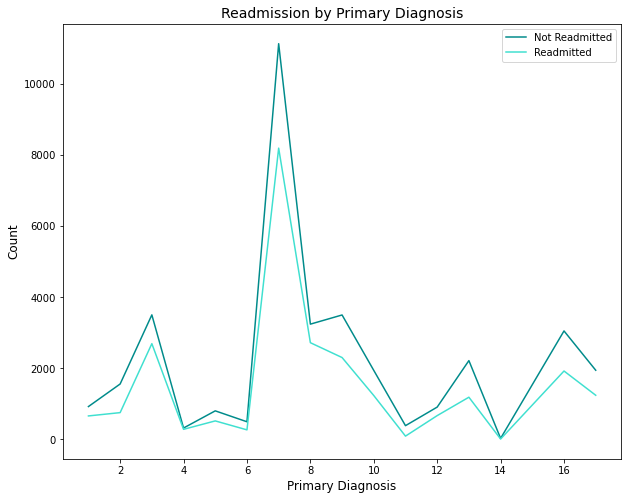

In [49]:
# Readmission by Primary Diagnosis

diag1_plot = pd.DataFrame(df.groupby('diag_1')['readmitted'].value_counts())
diag1_plot.unstack().plot(kind='line', color=['darkcyan', 'turquoise', 'teal'], figsize=(10,8))
plt.xlabel('Primary Diagnosis', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Primary Diagnosis', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

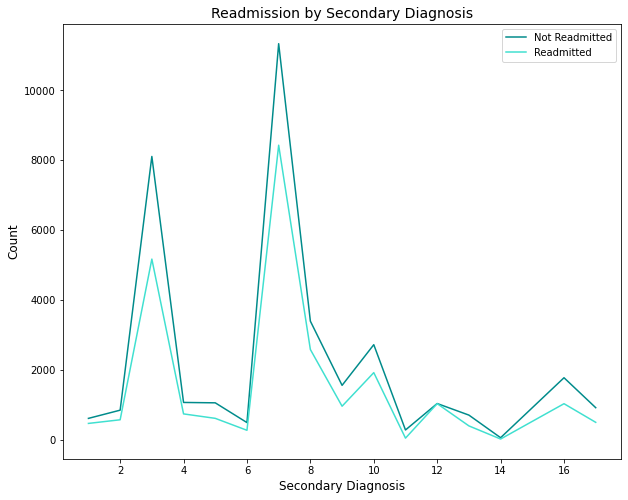

In [50]:
# Readmission by Secondary Diagnosis

diag2_plot = pd.DataFrame(df.groupby('diag_2')['readmitted'].value_counts())
diag2_plot.unstack().plot(kind='line', color=['darkcyan', 'turquoise', 'teal'], figsize=(10,8))
plt.xlabel('Secondary Diagnosis', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Secondary Diagnosis', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

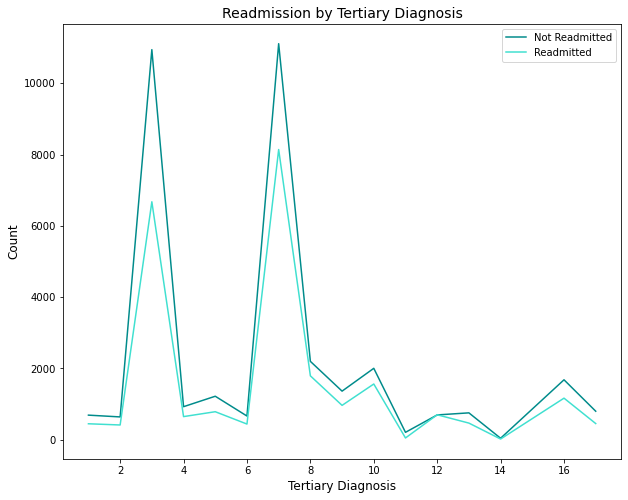

In [51]:
# Readmission by Tertiary Diagnosis

diag3_plot = pd.DataFrame(df.groupby('diag_3')['readmitted'].value_counts())
diag3_plot.unstack().plot(kind='line', color=['darkcyan', 'turquoise', 'teal'], figsize=(10,8))
plt.xlabel('Tertiary Diagnosis', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Readmission by Tertiary Diagnosis', fontsize=14)
plt.legend(['Not Readmitted', 'Readmitted'])

# Was the patient given an ALC Test? If so, was it normal?

- An ALC test is used to diagnose type 2 and prediabetes (type I or II diabetes)
- It measures the amount of hemoglobin with attached glucose and reflects your average blood glucose levels/the average levels of blood sugar over the past 3 months.
- A normal A1C level is below 5.7 percent
- Our dataset has a column named A1Cresult reflecting a patient’s A1C level during their hospital stay.

In [55]:
df['A1Cresult'].value_counts()

None    49327
>8       5445
Norm     3323
>7       2625
Name: A1Cresult, dtype: int64

In [56]:
df['A1C_test'] = np.where(df.A1Cresult == 'None', 0, 1)

In [57]:
df['A1C_test'].value_counts(normalize=True) * 100

0    81.236825
1    18.763175
Name: A1C_test, dtype: float64

Text(0.5, 1.0, 'HbA1c Test Distribution')

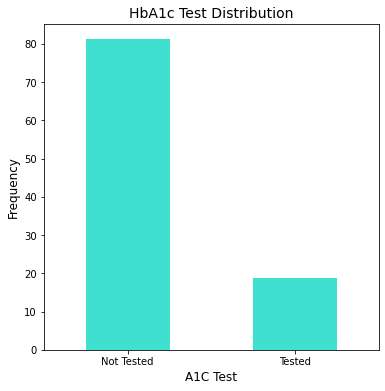

In [58]:
a1c_plot = df.A1C_test.value_counts(normalize=True) * 100
a1c_plot.plot(kind = 'bar', color = 'turquoise', figsize=(6,6))
plt.xlabel('A1C Test', fontsize=12)
plt.xticks([0,1,],labels= ['Not Tested', 'Tested'])
plt.xticks(rotation=0)
plt.ylabel('Frequency',fontsize=12)
plt.title('HbA1c Test Distribution', fontsize=14)

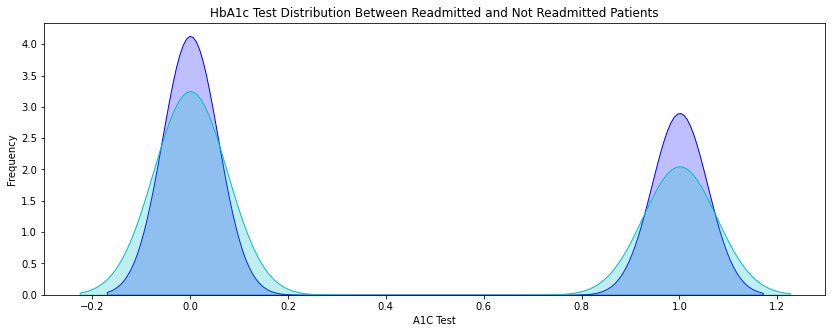

In [59]:
plt.figure(figsize=(14,5))
sns.kdeplot(df.loc[(df['A1C_test'] == 0), 'readmitted'], shade=True, label = 'No A1C Test', color = "b")
sns.kdeplot(df.loc[(df['A1C_test'] == 1), 'readmitted'], shade=True, label = 'A1C Test', color = "c")
plt.title("HbA1c Test Distribution Between Readmitted and Not Readmitted Patients")
plt.xlabel("A1C Test")
plt.ylabel("Frequency")
plt.show()

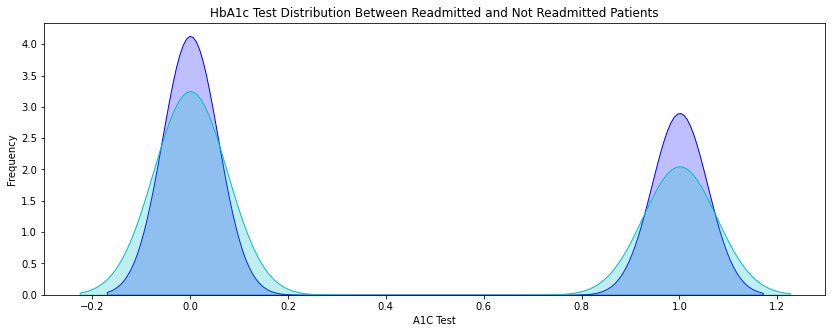

In [60]:
plt.figure(figsize=(14,5))
sns.kdeplot(df.loc[(df['A1C_test'] == 0), 'readmitted'], shade=True, label = 'No A1C Test', color = "b")
sns.kdeplot(df.loc[(df['A1C_test'] == 1), 'readmitted'], shade=True, label = 'A1C Test', color = "c")
plt.title("HbA1c Test Distribution Between Readmitted and Not Readmitted Patients")
plt.xlabel("A1C Test")
plt.ylabel("Frequency")
plt.show()